This notebook was written and used on a local machine and doesn't require CUDA or CUDNN.
This notebook was used for segregating the helmet class in a dataset into four coloured-helmet classes. The notebook displays an image and one helmet-bounding box and asks the user for the helmet colour. After the user gives input, the notebook writes the new class and bounding box to a text annotation file.

### This was a one-time use notebook.

## Variables to be modified accordingly

In [ ]:
# Files source folder containing the helmet-dataset images along with annotations
Uncoloured_source = 'Yolo_builds/Helmet_detection/Data_set/Images_and_annotations' 

# Destination folder where the new text annotations must be stored
Coloured_destination = 'Yolo_builds/Helmet_detection/Data_set/Colouring_helmets'

# Status location - The status.txt file stores how many images were annotated till now.
# This is so that we can continue the manual annotating session later on.
Status_file = 'Yolo_builds/Helmet_detection/Data_set/Colouring_helmets/Status.txt'

## Installations and Importations 

In [1]:
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from IPython. display import clear_output
%matplotlib inline

## Get the uncoloured helmet data files 

In [25]:
Colours = np.random.uniform(0,255,size=(3,3))
Colours = np.array([[254.9,0.1,0.1],[0.1,254.9,0.1],[0.1,254.9,0.1]])

TXT_file = [] #Store the annotation files here
IMG_file = [] #Store the image files here
for file in os.listdir(Uncoloured_source):
    if file.endswith('.txt'):
        TXT_file.append(file)
    else:
        IMG_file.append(file)

### To continue the colouring across multiple lines, we shall store the present status in a 'Status.txt' file. The file will contain only 1 integer in a single line denoting the number of completed file colourings. The next time you run the code, the status file will be checked and you can re-continue the session from that point.

# Check status

In [40]:
if(os.path.exists(Status_file)): #Check status
    with open(Status_file, 'r') as f:
        Status = f.readlines()
        print('Status = ',Status[0])
        Start = int(Status[0])
else: #If no status
    Start = -1
    

Status =  1902


# Loop and mark the boxes one by one

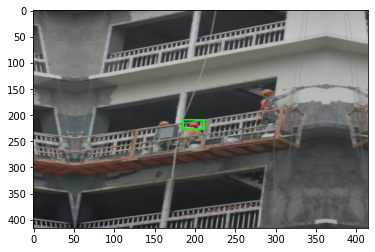

KeyboardInterrupt: Interrupted by user

In [39]:
## Start from status
for i in range(Start+1, len(TXT_file)):
    
    # Get entire annotation text and corresponding image
    with open(Uncoloured_source + '/' + TXT_file[i], 'r') as f:
        annotations = f.readlines()
        
    #Load the image
    Image = cv.imread(Uncoloured_source + '/' + IMG_file[i])
    Width = Image.shape[0]
    Height = Image.shape[1]
    
    # Loop over each annotation in txt file
    for annotation in annotations:
        Image_copy = np.copy(Image) #Use image copy to avoid overlapping boxes during image display
        Box = [float(value) for value in annotation.split()] #Convert str->list

        if(int(Box[0]) == 1): #If head skip colouring
            Box[0] = 5
        else:
            #Bounding box parameters
            x = int(Width * (Box[1]-Box[3]/2))
            y = int(Height * (Box[2]-Box[4]/2))
            x_plus_w = int(Width * (Box[1]+Box[3]/2))
            y_plus_h = int(Height * (Box[2]+Box[4]/2))

            cv.rectangle(Image_copy, (x,y), (x_plus_w,y_plus_h), Colours[int(Box[0])], 2) #Append bounding box

            #Display image
            Image_copy = cv.cvtColor(Image_copy, cv.COLOR_BGR2RGB) #Convert BGR numpy-array-image format to RGB
            plt.imshow(Image_copy, aspect='auto')
            plt.show()

            #Colour the helmets
            Box[0] = int(input('1-Blue \n2-Yellow \n3-White \n4-Red \n5-Head \n0-Skip\n'))
        
        if Box[0] not in {0,1,2,3,4,5}: #Raise error if class not valid
            waste = input("ERROR")
            
        if(Box[0] != 0): #If not skip(0) then do
            #Convert list->str
            Box[0] = Box[0] - 1
            Annotation = ' '.join([str(value) for value in Box])

            #Writing to TXT file
            if(annotation != annotations[-1]): #Move to next line if this isnt the last line/annotation
                Annotation = Annotation + '\n'
            with open(Coloured_destination + '/' + TXT_file[i], 'a') as f:
                f.write(Annotation)
    
        clear_output() #Clear previous outputs
        
    #Update status
    with open(Status_file, 'w') as f:
        f.write(str(i))
        

## 